In [407]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, make_scorer
from sklearn.model_selection import learning_curve
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [408]:
#data_transformed = pd.read_csv('new_data/clean-data_without_outliers.csv')
#competition_transformed = pd.read_csv('new_data/clean-comp.csv')
#data = pd.read_csv('new_data/clean-data_without_outliers.csv')
competition = pd.read_csv('new_data/clean-comp.csv')

data = pd.read_csv('new_data/complete-data.csv')
#data_transformed

In [409]:
data.sort_values('year')

,playerID,year,stint,tmID,GP,oRebounds,dRebounds,dq,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostDQ,ft%,fg%,three%,gs%,Postft%,Postfg%,Postthree%,Postgs%,efg%,ts%,ppg,rpg,apg,spg,bpg,eff,pp36,defensive_prowess,defensive_discipline,mpg,pos,college,playoff,confID,playoff_progression,height,weight,award_count,career_year,playoff_progression_rolling,playoff_rolling,pp36_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,defensive_discipline_rolling
640,392,3,0,567,5.0,0.20,0.60,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.37,0.00,0.80,0.0,0.0,0.00,0.0,0.74,0.82,7.60,0.80,0.80,0.40,0.60,-26.80,16.20,16.0,6.40,17.00,2,678,0.0,697,0,73.0,168,0.0,3,0.5,0.5,14.22,-149.875,0.0,48.60,4.44
639,391,3,0,559,10.0,0.80,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.50,0.50,0.00,0.0,0.0,0.00,0.0,1.26,1.32,5.20,1.30,0.70,0.20,0.00,-19.60,16.56,7.0,4.80,11.20,2,593,1.0,697,1,73.0,164,0.0,3,0.0,0.0,12.78,-151.800,0.0,20.45,8.04
344,225,3,0,554,5.0,1.40,1.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.38,0.00,0.20,0.0,0.0,0.00,0.0,0.76,0.68,1.20,2.60,0.20,0.60,0.60,-7.80,3.24,24.0,5.20,13.80,4,648,1.0,697,1,75.0,179,0.0,3,2.5,1.0,8.28,-67.700,0.0,24.15,5.53
345,226,3,0,566,32.0,0.62,1.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,0.42,0.32,0.31,0.0,0.0,0.00,0.0,0.92,0.98,9.81,1.84,2.97,1.72,0.03,-236.63,16.20,29.7,7.68,21.62,1,615,0.0,697,0,66.0,118,0.0,3,0.0,0.0,12.60,-120.680,0.0,21.15,5.50
355,236,3,0,553,28.0,0.29,0.39,0.04,8.0,3.4,0.4,0.4,0.8,0.4,0.0,0.0,0.2,0.4,0.0,0.75,0.33,0.31,0.04,0.5,0.5,0.22,0.0,0.78,0.88,2.68,0.68,0.36,0.25,0.07,-66.96,10.08,7.1,3.64,9.61,2,657,1.0,697,0,73.0,150,0.0,3,0.5,0.5,9.36,-89.410,0.0,12.40,4.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,243,11,0,552,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2,571,0.0,698,0,74.0,196,0.0,9,0.5,0.5,19.98,-267.790,0.0,53.75,10.39
396,256,11,0,569,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2,630,0.0,698,0,76.0,180,0.0,6,1.0,0.5,12.42,-228.340,0.0,54.55,8.59
399,258,11,0,741,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2,662,0.0,697,0,75.0,175,0.0,5,0.5,0.5,10.44,-131.025,0.0,20.25,6.59
738,438,11,0,558,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1,583,0.0,698,0,75.0,183,0.0,4,1.0,0.5,12.24,-82.975,0.0,13.65,3.15


In [410]:
competition.columns

Index(['playerID', 'year', 'stint', 'tmID', 'height', 'weight', 'pos',
       'college', 'confID'],
      dtype='object')

In [411]:
input_cols = ['playerID', 'year','stint', 'tmID', 'pos', 'college', 'height', 'weight', 'career_year', 'confID']

#add all columns ending in rolling from data to input cols
input_cols+=[c for c in data.columns if c.endswith("_rolling")]

# The output columns are the genres
output_cols = 'playoff'

known_columns = ['playerID', 'year', 'stint', 'tmID', 'height', 'weight', 'pos','college', 'confID']

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

print(input_cols)

['playerID', 'year', 'stint', 'tmID', 'pos', 'college', 'height', 'weight', 'career_year', 'confID', 'playoff_progression_rolling', 'playoff_rolling', 'pp36_rolling', 'eff_rolling', 'award_count_rolling', 'defensive_prowess_rolling', 'defensive_discipline_rolling']


In [412]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
data

,playerID,year,stint,tmID,GP,oRebounds,dRebounds,dq,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostDQ,ft%,fg%,three%,gs%,Postft%,Postfg%,Postthree%,Postgs%,efg%,ts%,ppg,rpg,apg,spg,bpg,eff,pp36,defensive_prowess,defensive_discipline,mpg,pos,college,playoff,confID,playoff_progression,height,weight,award_count,career_year,playoff_progression_rolling,playoff_rolling,pp36_rolling,eff_rolling,award_count_rolling,defensive_prowess_rolling,defensive_discipline_rolling
0,0,4,0,551,30.0,1.47,3.23,0.00,23.00,7.67,0.33,1.33,1.67,1.33,1.33,0.33,2.67,2.67,0.0,0.70,0.39,0.30,0.83,1.00,0.27,0.43,1.0,0.88,0.96,10.60,4.70,2.73,1.47,0.37,-272.13,14.40,50.7,11.26,26.40,2,571,1.0,697,1,74.0,169,0.0,3,0.0,0.0,14.40,-301.960,0.0,63.35,12.07
1,0,5,0,551,22.0,0.77,2.59,0.00,33.50,10.00,1.50,3.00,4.50,1.50,0.50,1.00,1.50,3.50,0.0,0.61,0.35,0.38,0.50,0.50,0.35,0.25,1.0,0.84,0.92,6.64,3.36,2.05,1.36,0.09,-137.50,11.52,40.5,7.72,21.00,2,571,1.0,697,1,74.0,169,0.0,4,0.5,0.5,14.22,-299.970,0.0,53.70,11.74
2,0,6,0,551,31.0,0.94,2.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.73,0.39,0.40,1.00,0.00,0.00,0.00,0.0,0.90,0.98,9.81,3.45,1.94,1.55,0.19,-250.06,14.04,42.6,10.70,25.06,2,571,0.0,697,0,74.0,169,0.0,5,1.0,1.0,12.96,-204.815,0.0,45.60,9.49
3,0,7,0,551,34.0,1.29,1.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.66,0.41,0.37,0.06,0.00,0.00,0.00,0.0,0.92,0.98,7.74,3.12,1.59,1.00,0.03,-210.52,12.96,28.5,7.48,21.29,2,571,0.0,697,0,74.0,169,0.0,6,0.5,0.5,12.78,-193.780,0.0,41.55,9.21
4,0,8,0,551,34.0,1.56,2.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.84,0.44,0.45,0.85,0.00,0.00,0.00,0.0,1.04,1.08,10.15,4.41,2.50,1.29,0.12,-222.53,14.76,42.6,9.06,24.79,2,571,0.0,697,0,74.0,169,0.0,7,0.0,0.0,13.50,-230.290,0.0,35.55,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,539,9,0,569,34.0,0.41,1.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.34,0.31,0.68,0.00,0.00,0.00,0.0,0.90,0.94,2.21,2.32,1.35,0.41,0.59,-82.12,4.68,29.1,6.70,17.47,2,631,0.0,698,0,73.0,183,0.0,7,0.0,0.0,5.94,-66.255,0.0,34.95,6.91
897,539,10,0,569,27.0,0.63,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.88,0.38,0.39,0.85,0.00,0.00,0.00,0.0,1.02,1.08,3.07,2.70,1.41,0.37,0.74,-67.71,5.76,31.9,6.66,19.67,2,631,0.0,698,0,73.0,183,0.0,8,0.0,0.0,5.76,-78.280,0.0,32.50,6.53
898,544,9,0,560,33.0,1.58,4.06,0.03,36.11,17.67,1.78,4.11,5.89,1.67,1.56,0.11,2.11,1.89,0.0,0.79,0.48,0.00,1.00,0.75,0.46,0.00,1.0,0.96,1.10,17.45,5.64,2.27,1.61,0.52,-299.51,19.80,61.8,8.66,31.94,2,628,1.0,697,3,73.0,165,0.0,3,1.0,0.5,16.02,-292.955,0.0,63.20,8.26
899,544,10,0,560,33.0,2.09,4.42,0.03,32.00,19.33,2.00,3.33,5.33,2.00,2.00,0.67,1.67,3.00,0.0,0.77,0.45,0.31,1.00,0.68,0.46,0.50,1.0,0.94,1.06,18.18,6.52,1.64,1.33,0.48,-340.85,19.44,62.4,7.82,33.73,2,628,1.0,697,1,73.0,165,0.0,4,2.5,1.0,18.90,-305.255,0.0,58.50,9.21


In [413]:
data.isnull().any()

playerID                        False
year                            False
stint                           False
tmID                            False
GP                              False
                                ...  
pp36_rolling                    False
eff_rolling                     False
award_count_rolling             False
defensive_prowess_rolling       False
defensive_discipline_rolling    False
Length: 55, dtype: bool

In [414]:
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from imblearn.pipeline import Pipeline

def plot_learning_curve(
    title,
    train_sizes, 
    train_scores, 
    test_scores, 
    fit_times,
    score_times,
    axes=None,
    ylim=None,
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    axes = axes.reshape(-1)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig = fig.delaxes(axes[-1])
    
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # Plot n_samples vs score_times
    axes[3].grid()
    axes[3].plot(train_sizes, score_times_mean, "o-")
    axes[3].fill_between(
        train_sizes,
        score_times_mean - score_times_std,
        score_times_mean + score_times_std,
        alpha=0.1,
    )
    axes[3].set_xlabel("Training examples")
    axes[3].set_ylabel("score_times")
    axes[3].set_title("Scalability of the model")

    # Plot score_time vs score
    score_time_argsort = score_times_mean.argsort()
    score_time_sorted = score_times_mean[score_time_argsort]
    test_scores_mean_sorted = test_scores_mean[score_time_argsort]
    test_scores_std_sorted = test_scores_std[score_time_argsort]
    axes[4].grid()
    axes[4].plot(score_time_sorted, test_scores_mean_sorted, "o-")
    axes[4].fill_between(
        score_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[4].set_xlabel("score_times")
    axes[4].set_ylabel("Score")
    axes[4].set_title("Performance of the model")

    return plt

In [415]:
model = DecisionTreeClassifier()
#loop in rolling window method through all data
unique_years = data['year'].unique()
#sort the years
unique_years.sort()
rolling_window_results = []
competition_predictions = []
trained_models = list()



print(unique_years)


[ 3  4  5  6  7  8  9 10 11]


In [416]:
def get_columns_to_remove():
    return ['playoff']

In [417]:

toZeroArr = [c for c in data.columns if c not in input_cols]
#add playoff to the list of columns to remove
toZeroArr.remove('playoff')
print(toZeroArr)

['GP', 'oRebounds', 'dRebounds', 'dq', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds', 'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostDQ', 'ft%', 'fg%', 'three%', 'gs%', 'Postft%', 'Postfg%', 'Postthree%', 'Postgs%', 'efg%', 'ts%', 'ppg', 'rpg', 'apg', 'spg', 'bpg', 'eff', 'pp36', 'defensive_prowess', 'defensive_discipline', 'mpg', 'playoff_progression', 'award_count']


In [418]:
def prepare_training_data(data, unique_years, i):
    train_years_before = unique_years[:i]
    train_years = unique_years[:i+1]
    test_year = unique_years[i]

    if i + 1 > len(unique_years): 
        return

    predict_year = unique_years[i+1]  # Predicting for year i+2 

    if predict_year < test_year:
        return

    # print("Train years:", train_years)
    # print("Predict Year: ", predict_year)
    
    train_before = data[data['year'].isin(train_years_before)]
    train = data[data['year'].isin(train_years)]
    test = data[data['year'] == test_year]
    actual = data[data['year'] == predict_year]

    return train_before, train, test, actual, predict_year, train_years, test_year


In [419]:

def process_data(train_before, train, test, actual, data, unique_years):
    #one hot encoding
    # train_before = pd.get_dummies(train_before, columns=['tmID', 'confID', 'pos', 'college', 'playerID'])
    # train = pd.get_dummies(train, columns=['tmID', 'confID', 'pos', 'college', 'playerID']) 
    # Removing and adding rows based on certain conditions
    # train_before_indices_to_remove = []
    # train_indices_to_remove = []
    # #check if a player have a entry in the train df with the next year
    # for index, row in train_before.iterrows():
    #     player_id = row['playerID']
    #     year = row['year'] + 1 
    #     if row['stint'] > 1:
    #         train_before_indices_to_remove.append(index)
    #     elif not (((train['playerID'] == player_id) & (train['year'] == year)).any()):
    #         data_to_add = {
    #             'playerID': player_id, 
    #             'year': year,        
    #         }
    #         new_row = pd.DataFrame(data_to_add, index=[0])
    #         train = pd.concat([train, new_row], ignore_index=True)
       

    # train_before = train_before.drop(train_before_indices_to_remove)
    # for index, row in train.iterrows():
    #     player_id = row['playerID']
    #     year = row['year'] - 1 
    #     if row['stint'] > 1:
    #         train_indices_to_remove.append(index)
    #     elif not (((train_before['playerID'] == player_id) & (train_before['year'] == year)).any()):
    #         data_to_add = {
    #             'playerID': player_id, 
    #             'year': year,        
    #         }
    #         new_row = pd.DataFrame(data_to_add, index=[0])
    #         train_before = pd.concat([train_before , new_row], ignore_index=True)

    # train = train_before.drop(train_indices_to_remove)
    # train.fillna(0, inplace=True)
    # train.sort_values(by='playerID', inplace=True)
    # train_before.fillna(0, inplace=True)
    # train_before.sort_values(by='playerID', inplace=True)
    remove_columns = get_columns_to_remove()
    actual[toZeroArr] = 0

    #remove stint > 0
    train = train[train['stint'] == 0]
    actual = actual[actual['stint'] == 0]


    X_train = train.drop(remove_columns, axis=1)
    y_train = train[output_cols]
    X_actual = actual.drop(remove_columns, axis=1)
    y_actual = actual[output_cols]

    return X_train, y_train, X_actual, y_actual


In [420]:

def train_and_evaluate_model(X_train, y_train, model):
    classifier = model.fit(X_train, y_train)
    return classifier


In [421]:

def predict_and_evaluate(classifier, X_actual, y_actual):
    accuracy = 0.0
    auc_score = 0.0
    # Evaluate the model
    predictions = classifier.predict(X_actual)
    predictions_prob = classifier.predict_proba(X_actual)[:, 1]

    if X_actual['year'].unique()[0]==11:
        competition_predictions.append(predictions)
    else:
        accuracy = accuracy_score(y_actual, predictions)
        auc_score = roc_auc_score(y_actual, predictions_prob)

    return accuracy, auc_score, predictions, predictions_prob


In [422]:

def rolling_window_method(i, model, data, unique_years):
    train_before, train, test, actual, predict_year, train_years, test_year = prepare_training_data(data, unique_years, i)
    
    if train_before is None:
        return None

    X_train, y_train, X_actual, y_actual= process_data(train_before, train, test, actual, data, unique_years)

    #print years in X_train and X_actual
    print("Unique years in X_train:", X_train['year'].unique())
    print("Unique years in X_actual:", X_actual['year'].unique())
    
    #create a csv file for each year, storing the data for that year and that model, in the folder output/rolling_window
    #X_train.to_csv(f'output/rolling_window/{model.__class__.__name__}_{test_year}_train.csv', index=False)
    #X_test.to_csv(f'output/rolling_window/{model.__class__.__name__}_{test_year}_test.csv', index=False)
    #X_actual.to_csv(f'output/rolling_window/{model.__class__.__name__}_{test_year}_actual.csv', index=False)
    # y_actual.to_csv(f'output/rolling_window/{model.__class__.__name__}_{test_year}_y_actual.csv', index=False)


    classifier = train_and_evaluate_model(X_train, y_train, model)

    # Calculate accuracy

    accuracy, auc_score, predictions, predictions_prob = predict_and_evaluate(classifier, X_actual, y_actual)

    #print(f"Best params for {model.__class__.__name_}: {model.best_params_}")
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"AUC: {auc_score:.4f}")


    return {
        'train_years': train_years,
        'test_year': test_year,
        'Year': predict_year,
        'accuracy': accuracy,
        'auc': auc_score,
        'model': classifier,
        'predictions': predictions,
        'predictions_prob': predictions_prob,
        'actual_results': y_actual,
    }

In [423]:

def model_training_loop(model, data, unique_years):
    rolling_window_results = []
    for i in range(len(unique_years) - 1):
        result= rolling_window_method(i, model, data, unique_years)
        if result:
            rolling_window_results.append(result)
    return rolling_window_results

In [424]:
# model = DecisionTreeClassifier()
# rolling_window_results += model_training_loop(model, data, unique_years)
# trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

In [425]:
model = RandomForestClassifier()
rolling_window_results += model_training_loop(model, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


In [426]:
model = GradientBoostingClassifier()
rolling_window_results += model_training_loop(model, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


In [427]:
#gaussian naive bayes
model = GaussianNB()
rolling_window_results += model_training_loop(model, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


In [428]:
#logistic regression
model = LogisticRegression()
rolling_window_results += model_training_loop(model, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


In [429]:
#ada boost
model = AdaBoostClassifier()
rolling_window_results += model_training_loop(model, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


In [430]:
level0 = list()
#append models in trained_models to level0
for i in range(len(trained_models)):
    level0.append((str(i), trained_models[i]))

level1 = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=9, bootstrap=True, criterion='entropy', random_state=20)
clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)

rolling_window_results += model_training_loop(clf, data, unique_years)
trained_models.append(rolling_window_results[-1]['model'])  # Get the last trained model

Unique years in X_train: [3]
Unique years in X_actual: [4]
Unique years in X_train: [4 3]
Unique years in X_actual: [5]
Unique years in X_train: [4 5 3]
Unique years in X_actual: [6]
Unique years in X_train: [4 5 6 3]
Unique years in X_actual: [7]
Unique years in X_train: [4 5 6 7 3]
Unique years in X_actual: [8]
Unique years in X_train: [4 5 6 7 8 3]
Unique years in X_actual: [9]
Unique years in X_train: [4 5 6 7 8 9 3]
Unique years in X_actual: [10]
Unique years in X_train: [ 4  5  6  7  8  9  3 10]
Unique years in X_actual: [11]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'RandomForestClassifier': [0.39814814814814814, 0.3979591836734694, 0.375, 0.39805825242718446, 0.3177570093457944, 0.38461538461538464, 0.33, 0.0], 'GradientBoostingClassifier': [0.39814814814814814, 0.3979591836734694, 0.375, 0.39805825242718446, 0.32710280373831774, 0.38461538461538464, 0.33, 0.0], 'GaussianNB': [0.4166666666666667, 0.3877551020408163, 0.375, 0.39805825242718446, 0.3177570093457944, 0.38461538461538464, 0.33, 0.0], 'LogisticRegression': [0.6018518518518519, 0.5204081632653061, 0.6136363636363636, 0.6019417475728155, 0.6822429906542056, 0.6153846153846154, 0.67, 0.0], 'AdaBoostClassifier': [0.4074074074074074, 0.3979591836734694, 0.375, 0.39805825242718446, 0.3177570093457944, 0.38461538461538464, 0.33, 0.0], 'StackingClassifier': [0.4166666666666667, 0.3979591836734694, 0.375, 0.39805825242718446, 0.3177570093457944, 0.38461538461538464, 0.33, 0.0]}
RandomForestClassifier
[0.39814814814814814, 0.3979591836734694, 0.375, 0.39805825242718446, 0.3177570093457944, 0.38

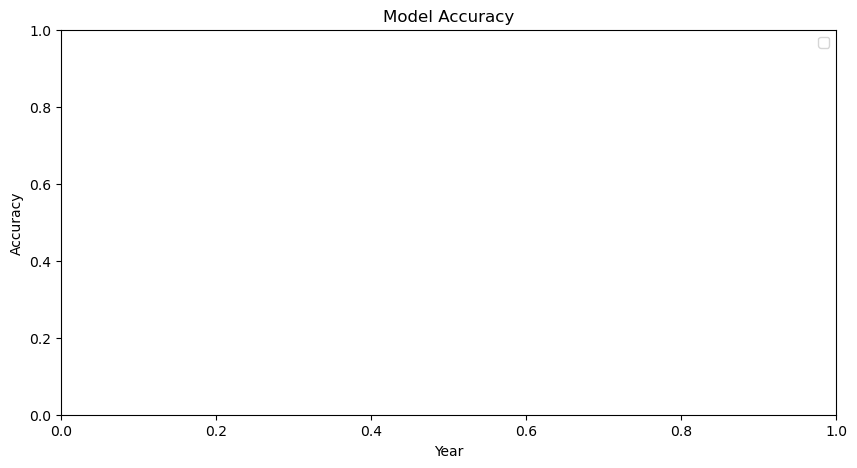

In [433]:
# {
#         'train_years': train_years,
#         'test_year': test_year,
#         'Year': predict_year,
#         'accuracy': accuracy,
#         'auc': auc_score,
#         'model': classifier,
#         'predictions': predictions,
#         'predictions_prob': predictions_prob,
#         'actual_results': y_actual,
# }

#make a dictionary of the model: [accuracy]
model_accuracy = dict()
for result in rolling_window_results:
    model_name = result['model'].__class__.__name__
    if model_name not in model_accuracy:
        model_accuracy[model_name] = []
    model_accuracy[model_name].append(result['accuracy'])

print(model_accuracy)

#plot model accuracy in one line chart (x-axis: year, y-axis: accuracy) years are 3,4,5,6,7,8,9,10,11
years = [3,4,5,6,7,8,9,10,11]
plt.figure(figsize=(10, 5))
plt.title('Model Accuracy')
plt.xlabel('Year')
plt.ylabel('Accuracy')
for model_name in model_accuracy:
    try:
        plt.plot(years, model_accuracy[model_name], label=model_name)
    except:
        print(model_accuracy[model_name])
plt.legend()
plt.savefig('output/rolling_window/model_accuracy.png')
plt.show()



    
